In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [463]:
#1 
fic = open("data_ffnn_3classes.txt", "r")
data = np.loadtxt(fic)
fic.close()

#Convert the y array into a matrix of 3 columns
def transfo_output(y):
    a = np.zeros(3)
    a[y] = 1
    return a

# Input data matrix
training_input = [np.reshape(x, (1, 2)) for x in data[:,:2].astype(float)]

  # Output matrix
training_output = np.array([transfo_output(y) for y in np.array(data[:,2]).T.astype(int)])





In [464]:
#2
class Neural_Network1():
    def init(self):
        self.inputLayerSize=2
        self.outputLayerSize=3
        self.hiddenLayerSize=5
        
        self.w1=np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.w2=np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
        #print(self.w1)
        #print(self.w2)
        
        
        
    def sigmoid(self, z):
        return 1/(1+np.exp(-z))
    
    def forward(self, X):
         
        self.z2 = np.dot(X,self.w1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.w2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def train(self,X,y):
        err=0

        for x, y in zip(training_input, training_output): 
            yHat = NN.forward(x)
                
            #calculation of the error 
            #very high error contrary of the one we got for the back propagation 
            e = 1 / 2 * np.sum((y - yHat)**2)
            print(e)
        

In [465]:
NN = Neural_Network()
NN.init()

NN.train(training_input,training_output)


0.45459207263708634
0.45662824543906166
0.47215481153010286
0.4665476956353064
0.47145802394875463
0.47890352359926336
0.47251743404670177
0.48194183469467544
0.46684961801552927
0.46573163735009904
0.47478108399119223
0.46607302412400775
0.4504201355434584
0.45937018587578793
0.46148610445168076
0.47394536293001355
0.47811880917927685
0.47898245014306307
0.47359156341449093
0.46670944880377574
0.6390017645355602
0.6619114803539784
0.6601543123361845
0.6759557526657187
0.6763908907143887
0.6983477798692775
0.708468130927336
0.6917403076948309
0.6882796280212368
0.6632729974437239
0.6663405403217362
0.6213954058148177
0.656638870832482
0.6377103289680907
0.6383901388844151
0.6486883382845741
0.6424754633017955
0.5999763330331739
0.6132782557562073
0.5878249557883783
0.5996460605933599
0.6182779758958084
0.623159031842417
0.6785658737752426
0.6838348134628571
0.7045121821387481
0.6833080788039019
0.6862698286731961
0.5945567721183895
0.5862657883730302
0.404339872802304
0.107344449964689

In [466]:
#1

from scipy.special import expit

class Neural_Network2():
    
    def init(self):
        #init V and W
        self.inputLayerSize=2
        self.outputLayerSize=3
        self.hiddenLayerSize=5
        
        self.w1=np.random.randn(self.inputLayerSize,self.hiddenLayerSize)
        self.w2=np.random.randn(self.hiddenLayerSize,self.outputLayerSize)
    
    #use of expit to reduce the flow of data due to input values
    def sigmoid(self, z):
        return expit(z)
    
    def sigmoidPrime(self,x):
        return sigmoid(x) * (1.0 - sigmoid(x))
    
    def forward(self, X):
        self.z2 = np.dot(X,self.w1)
        self.a2 = self.sigmoid(self.z2)
        self.z3 = np.dot(self.a2,self.w2)
        yHat = self.sigmoid(self.z3)
        return yHat
    
    def train(self,X,y,iteration,alpha):
        
        for i in range(iteration):
            err=0
            result=[]
            
            for x, y in zip(training_input, training_output):
                #for each value of training input we use the forward algorithm
                z2 = np.dot(x,self.w1)
                a2 = self.sigmoid(z2)
                z3 = np.dot(a2,self.w2)
                yHat = self.sigmoid(z3)                 
                
                #calculation of the error 
                e = 1 / 2 * np.sum((y - yHat)**2)
                
                #calculation of the derivative error 
                delta3 = np.multiply((yHat-y),self.sigmoidPrime(z3))
                dEdW2 = np.dot(a2.T,delta3)
                delta2 = np.dot(delta3,self.w2.T)*self.sigmoidPrime(z2)
                dEdW1 = np.dot(x.T, delta2)
                
                #calculation of a better V and W through the iterations
                self.w1=self.w1 - alpha*dEdW1
                self.w2=self.w2 - alpha*dEdW2
                
                #we stock the better values of yHat 
                if(i==999):
                    result.append(yHat)
        
            #2
            plt.scatter(i, e)
        
        print("The best error that we find is :",e)
        
        #3
        print("v")
        print(self.w1)
        print("w")
        print(self.w2)
        plt.show()
        
        return result
       
    #4    
    def convert_1(self,x):
            if x[0][0] > 0.66:
                return 0
            if x[0][1] > 0.66:
                return 1
            return 2
    
    def convert_2(self,x):
        if x[0] > 0.66:
            return 0
        if x[1] > 0.66:
            return 1
        return 2
        
    #we only get an average of 60 successes over 71. We don't know where the error comes from but most of them appears for the output y=1
    def verify(self,result):
        sucess = 0
        for i in range(0, len(result)):
            if NN2.convert_1(result[i]) == NN2.convert_1([training_output[i]]):
                sucess+=1
        print("nombre succès")
        print(sucess)
    
    #5
    def test(self, x1, x2):
        tmp = np.array([x1, x2])
        return self.forward(tmp)
    
    
        
    
    
    

The best error that we find is : 0.00019380985370717705
v
[[ 1.38990856 -0.12003344  4.55231321  0.18502427  0.14688721]
 [ 2.20327692  0.48814217 -7.1373729  -0.54155648 -0.50974025]]
w
[[  2.94721831  -3.14447216  -3.70779033]
 [ -5.05174783   5.46845889  -1.78374258]
 [-10.25859057  -3.26397903   7.54947942]
 [  6.4758865   -7.30927463   0.59601294]
 [  5.73447845  -5.99343622   2.44871797]]


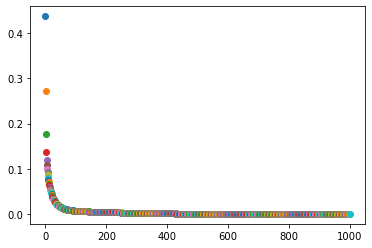

nombre succès
61
[0.96986504 0.0214193  0.02035692]  =  0
[0.76501363 0.22275758 0.01016778]  =  0
[1.64781545e-02 4.79486659e-05 9.86955738e-01]  =  2


In [467]:
NN2=Neural_Network2()
NN2.init()
result=NN2.train(training_input,training_output,1000,0.1)
NN2.verify(result)

tmp = NN2.test(2, 2)
print(tmp, " = ", str(NN2.convert_2(tmp)))
#we got an error here
#it confirms what we said before which is that we got an error when y=1
tmp = NN2.test(4, 4)
print(tmp, " = ", str(NN2.convert_2(tmp)))
tmp = NN2.test(4.5, 1.5)
print(tmp, " = ", str(NN2.convert_2(tmp)))